<a href="https://colab.research.google.com/github/twisha-a/MedGemma_VLM/blob/main/MedGemma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install dependencies

In [1]:
! pip install --upgrade --quiet accelerate bitsandbytes transformers

In [2]:
# Clean reinstall to fix missing ops like torchvision::nms
!pip install --upgrade --force-reinstall torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install --upgrade --force-reinstall transformers huggingface_hub


Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.4/515.4 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Set model variant and configuration
> `4b-it`: 4 billion parameter model.

>  `27b-text-it`: 27 billion parameter text-focused model. Will require A100

In [2]:
from transformers import BitsAndBytesConfig
import torch

model_variant = "4b-it"  # @param ["4b-it", "27b-text-it"]
model_id = f"google/medgemma-{model_variant}"

use_quantization = True  # @param {type: "boolean"}

# @markdown Set `is_thinking` to `True` to turn on thinking mode. **Note:** Thinking is supported for the 27B variant only.
is_thinking = False  # @param {type: "boolean"}

# If running the 27B variant in Google Colab, check if the runtime satisfies
# memory requirements
if "27b" in model_variant and google_colab:
    if not ("A100" in torch.cuda.get_device_name(0) and use_quantization):
        raise ValueError(
            "Runtime has insufficient memory to run the 27B variant. "
            "Please select an A100 GPU and use 4-bit quantization."
        )

model_kwargs = dict(
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

if use_quantization:
    model_kwargs["quantization_config"] = BitsAndBytesConfig(load_in_4bit=True)

## Run inference on images and text

This section demonstrates running inference on image-based tasks using multimodal variants.

**Note:** Proceed to [Run inference on text only](#scrollTo=tcyXG4lTpY4X) if you have selected the 27B text-only variant.

In [3]:
if "text" in model_variant:
    raise ValueError(
        "You are using a text-only variant which does not support multimodal "
        "inputs. Please proceed to the 'Run inference on text only' section."
    )

**Specify image and text inputs**

In [4]:
import os
from PIL import Image
from IPython.display import Image as IPImage, display, Markdown

prompt = "Describe if this is an mpox image or a chickenpox image"  # @param {type: "string"}

# Image attribution: Stillwaterising, CC0, via Wikimedia Commons
image_url = "https://upload.wikimedia.org/wikipedia/commons/a/a4/22-1374-F1.jpg"  # @param {type: "string"}
! wget -nc -q {image_url}
image_filename = os.path.basename(image_url)
image = Image.open(image_filename)

**Format conversation**

In [5]:
system_instruction = "You are an expert virologist."

messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": system_instruction}]
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt},
            {"type": "image", "image": image}
        ]
    }
]

The following standalone examples demonstate how to use the model both directly and with the [`pipeline`](https://huggingface.co/docs/transformers/en/main_classes/pipelines) API. The `pipeline` API provides a simple way to use the model for inference while abstracting away complex details,  while directly using the model gives you complete control over the inference process, including preprocessing and postprocessing. In practice, you should select the method that is best suited for your use case.

**Run model with the `pipeline` API**

In [6]:
from transformers import pipeline

pipe = pipeline(
    "image-text-to-text",
    model=model_id,
    model_kwargs=model_kwargs,
)

pipe.model.generation_config.do_sample = False

config.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Device set to use cuda:0


The following generation flags are not valid and may be ignored: ['top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


---

**[ User ]**

Describe if this is an mpox image or a chickenpox image

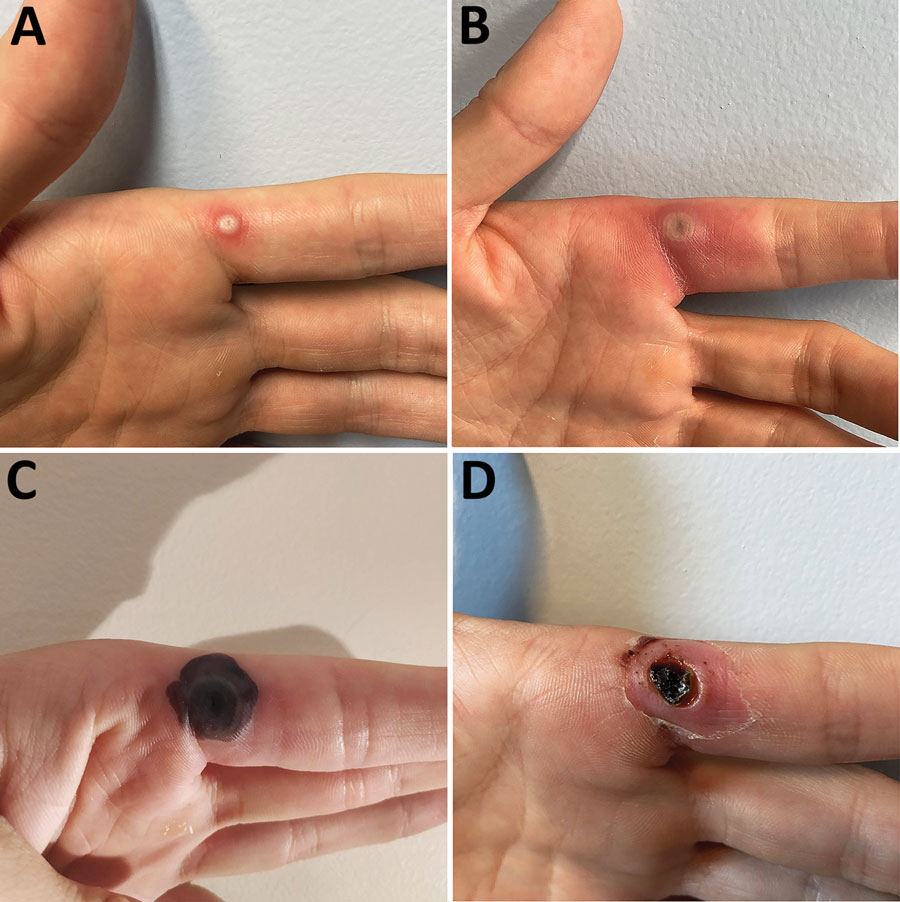

---

**[ MedGemma ]**

Based on the images provided, it is **highly likely that these are images of **mpox** lesions.**

Here's why:

*   **Location:** The lesions are primarily located on the hands, which is a common site for mpox lesions. Chickenpox lesions are more typically found on the face, trunk, and scalp.
*   **Appearance:** The lesions appear to be vesicular (fluid-filled blisters) with a surrounding red base. This is characteristic of mpox. Chickenpox lesions also present as vesicles, but they can sometimes have a more "dewdrop on a rose petal" appearance.
*   **Progression:** The progression of the lesions from papules (small bumps) to vesicles and then to pustules (pus-filled blisters) is typical of mpox.

**Important Considerations:**

*   **Diagnosis:** A definitive diagnosis of mpox requires laboratory confirmation through PCR testing of lesion material.
*   **Differential Diagnosis:** Other conditions can present with similar skin lesions, so a thorough clinical evaluation is necessary.

**Disclaimer:** I am an AI and cannot provide medical diagnoses. This information is for educational purposes only and should not be considered a substitute for professional medical advice. If you suspect you have been exposed to mpox or have any concerns about your health, please consult a healthcare professional.

---

In [7]:
output = pipe(text=messages, max_new_tokens=300)
response = output[0]["generated_text"][-1]["content"]

display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}"))
display(IPImage(filename=image_filename, height=300))
display(Markdown(f"---\n\n**[ MedGemma ]**\n\n{response}\n\n---"))

**Run the model directly**

In [ ]:
from transformers import AutoModelForImageTextToText, AutoProcessor

model = AutoModelForImageTextToText.from_pretrained(
    model_id,
    **model_kwargs,
)
processor = AutoProcessor.from_pretrained(model_id)

In [ ]:
inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
).to(model.device, dtype=torch.bfloat16)

input_len = inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**inputs, max_new_tokens=300, do_sample=False)
    generation = generation[0][input_len:]

response = processor.decode(generation, skip_special_tokens=True)

display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}"))
display(IPImage(filename=image_filename, height=300))
display(Markdown(f"---\n\n**[ MedGemma ]**\n\n{response}\n\n---"))

## Run inference on text only

This section demonstrates running inference on text-based tasks.

**Specify text prompt and format conversation**

In [ ]:
from IPython.display import Markdown

prompt = "How do you differentiate mpox from Chickenpox?"  # @param {type: "string"}

role_instruction = "You are a helpful medical assistant."
if "27b" in model_variant and is_thinking:
    system_instruction = f"SYSTEM INSTRUCTION: think silently if needed. {role_instruction}"
    max_new_tokens = 1500
else:
    system_instruction = role_instruction
    max_new_tokens = 500

messages = [
    {
        "role": "system",
        "content": system_instruction
    },
    {
        "role": "user",
        "content": prompt
    }
]

The following standalone examples demonstate how to use the model both directly and with the [`pipeline`](https://huggingface.co/docs/transformers/en/main_classes/pipelines) API. The `pipeline` API provides a simple way to use the model for inference while abstracting away complex details,  while directly using the model gives you complete control over the inference process, including preprocessing and postprocessing. In practice, you should select the method that is best suited for your use case.

**Run model with the `pipeline` API**

In [ ]:
from transformers import pipeline

pipe = pipeline(
    "text-generation",
    model=model_id,
    model_kwargs=model_kwargs,
)

pipe.model.generation_config.do_sample = False

In [ ]:
output = pipe(messages, max_new_tokens=max_new_tokens)
response = output[0]["generated_text"][-1]["content"]

display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}\n\n---"))
if "27b" in model_variant and is_thinking:
    thought, response = response.split("<unused95>")
    thought = thought.replace("<unused94>thought\n", "")
    display(Markdown(f"**[ MedGemma thinking ]**\n\n{thought}\n\n---"))
display(Markdown(f"**[ MedGemma ]**\n\n{response}\n\n---"))

**Run the model directly**

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    **model_kwargs,
)
tokenizer = AutoTokenizer.from_pretrained(model_id)

In [ ]:
inputs = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
).to(model.device)

input_len = inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**inputs, max_new_tokens=max_new_tokens, do_sample=False)
    generation = generation[0][input_len:]

response = tokenizer.decode(generation, skip_special_tokens=True)

display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}\n\n---"))
if "27b" in model_variant and is_thinking:
    thought, response = response.split("<unused95>")
    thought = thought.replace("<unused94>thought\n", "")
    display(Markdown(f"**[ MedGemma thinking ]**\n\n{thought}\n\n---"))
display(Markdown(f"**[ MedGemma ]**\n\n{response}\n\n---"))